In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
rating_prediction=pd.read_csv('rating_prediction_dataset.csv')
rating_prediction

rating_title  \
0            Unsatisfactory   
1                  very bad   
2      Utterly Disappointed   
3       Money waste product   
4           Waste of money!   
...                     ...   
20945                Super!   
20946             Must buy!   
20947             Just wow!   
20948          Quality good   
20949        Classy product   

                                          review_content  rating  
0                                      worst experience.       1  
1      the performance of this printer in not good, p...       1  
2            speaker not wark very bed product don't buy       1  
3       Totally unrelevant product for tracking servi...       1  
4                         Not satisfied returned product       1  
...                                                  ...     ...  
20945                                              Supar       5  
20946                                              Super       5  
20947                        5 star camera for beginners       5  
20948        Screen quality and touch screen very smooth       5  
20949                Good in this price range\nI like it       5  

[20950 rows x 3 columns]

In [3]:
#count of target variable - 5 is for most highest rating and 1 is lowest rating
rating_prediction['rating'].value_counts()

5    4190
4    4190
3    4190
2    4190
1    4190
Name: rating, dtype: int64

In [4]:
rating_prediction.shape 

(20950, 3)

In [5]:
# checking null values
rating_prediction.isnull().sum()

rating_title      0
review_content    1
rating            0
dtype: int64

In [6]:
# Now treating null values, fill null values with unknown rating_content

rating_prediction.review_content.fillna('unknown rating content',inplace=True)

In [7]:
# checking null values again
rating_prediction.isnull().sum()

rating_title      0
review_content    0
rating            0
dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

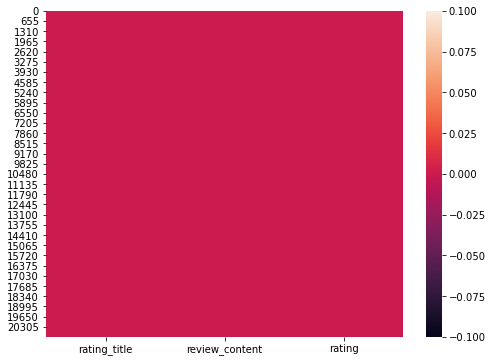

In [9]:
# plot null value chart
plt.figure(figsize=(8,6))
sns.heatmap(rating_prediction.isnull())

In [10]:
# checking datatype
rating_prediction.dtypes

rating_title      object
review_content    object
rating             int64
dtype: object

observation- we have onject object datatype in rating_title and review_content columns and int datatype in rating column

In [11]:
# remove emoji from dataset
rating_prediction = rating_prediction.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [12]:
# Creating new column for Length of rating_title, rating_content  
rating_prediction['length_of_rating_title'] = rating_prediction.rating_title.str.len()
rating_prediction['length_of_review_content'] = rating_prediction.review_content.str.len()
rating_prediction.head(5)

rating_title                                     review_content  \
0        Unsatisfactory                                  worst experience.   
1              very bad  the performance of this printer in not good, p...   
2  Utterly Disappointed        speaker not wark very bed product don't buy   
3   Money waste product   Totally unrelevant product for tracking servi...   
4       Waste of money!                     Not satisfied returned product   

  rating  length_of_rating_title  length_of_review_content  
0      1                      14                        17  
1      1                       8                       178  
2      1                      20                        43  
3      1                      19                       149  
4      1                      15                        30

In [13]:
# Convert all headline text and news text to lower case
rating_prediction['rating_title'] = rating_prediction['rating_title'].str.lower()
rating_prediction['review_content'] = rating_prediction['review_content'].str.lower()
rating_prediction

rating_title  \
0            unsatisfactory   
1                  very bad   
2      utterly disappointed   
3       money waste product   
4           waste of money!   
...                     ...   
20945                super!   
20946             must buy!   
20947             just wow!   
20948          quality good   
20949        classy product   

                                          review_content rating  \
0                                      worst experience.      1   
1      the performance of this printer in not good, p...      1   
2            speaker not wark very bed product don't buy      1   
3       totally unrelevant product for tracking servi...      1   
4                         not satisfied returned product      1   
...                                                  ...    ...   
20945                                              supar      5   
20946                                              super      5   
20947                        5 star camera for beginners      5   
20948        screen quality and touch screen very smooth      5   
20949                good in this price range\ni like it      5   

       length_of_rating_title  length_of_review_content  
0                          14                        17  
1                           8                       178  
2                          20                        43  
3                          19                       149  
4                          15                        30  
...                       ...                       ...  
20945                       6                         5  
20946                       9                         5  
20947                       9                        27  
20948                      12                        43  
20949                      14                        34  

[20950 rows x 5 columns]

In [14]:
# Replace email addresses with 'email'
rating_prediction['rating_title'] = rating_prediction['rating_title'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                                    'emailaddress')
rating_prediction['review_content'] = rating_prediction['review_content'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                                    'emailaddress')

# Replace URLs with 'webaddress'
rating_prediction['rating_title'] = rating_prediction['rating_title'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')
rating_prediction['review_content'] = rating_prediction['review_content'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
rating_prediction['rating_title'] = rating_prediction['rating_title'].str.replace(r'£|\$', 'dollers')
rating_prediction['review_content'] = rating_prediction['review_content'].str.replace(r'£|\$', 'dollers')


# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
rating_prediction['rating_title'] = rating_prediction['rating_title'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
rating_prediction['review_content'] = rating_prediction['review_content'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
rating_prediction['rating_title'] = rating_prediction['rating_title'].str.replace(r'\d+(\.\d+)?', 'numbr')
rating_prediction['review_content'] = rating_prediction['review_content'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [15]:
# Remove punctuation
rating_prediction['rating_title'] = rating_prediction['rating_title'].str.replace(r'[^\w\d\s]', ' ')
rating_prediction['review_content'] = rating_prediction['review_content'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
rating_prediction['rating_title'] = rating_prediction['rating_title'].str.replace(r'\s+', ' ')
rating_prediction['review_content'] = rating_prediction['review_content'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
rating_prediction['rating_title'] = rating_prediction['rating_title'].str.replace(r'^\s+|\s+?$', '')
rating_prediction['review_content'] = rating_prediction['review_content'].str.replace(r'^\s+|\s+?$', '')

In [16]:
# remove multiple whitespaces, tabs
rating_prediction['rating_title'] = rating_prediction['rating_title'].str.replace('\n', '')
rating_prediction['review_content'] = rating_prediction['review_content'].str.replace('\t', ' ')

In [17]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', 'im', 'dont', 'doin', 'ure'])

rating_prediction['rating_title'] = rating_prediction['rating_title'].apply(lambda x: ' '.join(
    term for term in str(x).split() if term not in stop_words))



rating_prediction['review_content'] = rating_prediction['review_content'].apply(lambda x: ' '.join(
    term for term in str(x).split() if term not in stop_words))

In [18]:
# New column (clean_length) after puncuations,stopwords removal
rating_prediction['clean_length_of_rating_title'] = rating_prediction.rating_title.str.len()
rating_prediction['clean_length_of_review_content'] = rating_prediction.review_content.str.len()

rating_prediction.head()

rating_title                                     review_content  \
0        unsatisfactory                                   worst experience   
1                   bad  performance printer good printing speed really...   
2  utterly disappointed                       speaker wark bed product buy   
3   money waste product  totally unrelevant product tracking services g...   
4           waste money                         satisfied returned product   

  rating  length_of_rating_title  length_of_review_content  \
0      1                      14                        17   
1      1                       8                       178   
2      1                      20                        43   
3      1                      19                       149   
4      1                      15                        30   

   clean_length_of_rating_title  clean_length_of_review_content  
0                            14                              16  
1                             3                             112  
2                            20                              28  
3                            19                              96  
4                            11                              26

In [19]:
# Total length removal
print ('Origian Length', rating_prediction.length_of_rating_title.sum())
print ('Clean Length', rating_prediction.clean_length_of_rating_title.sum())

print ('Origian Length', rating_prediction.length_of_review_content.sum())
print ('Clean Length', rating_prediction.clean_length_of_review_content.sum())

Origian Length 325299
Clean Length 264960
Origian Length 1644860
Clean Length 1147728


In [20]:
rating_prediction.dtypes

rating_title                      object
review_content                    object
rating                            object
length_of_rating_title             int64
length_of_review_content           int64
clean_length_of_rating_title       int64
clean_length_of_review_content     int64
dtype: object

In [21]:
rating_prediction['rating'] = rating_prediction.rating.astype(int)

In [22]:
rating_prediction.dtypes

rating_title                      object
review_content                    object
rating                             int32
length_of_rating_title             int64
length_of_review_content           int64
clean_length_of_rating_title       int64
clean_length_of_review_content     int64
dtype: object

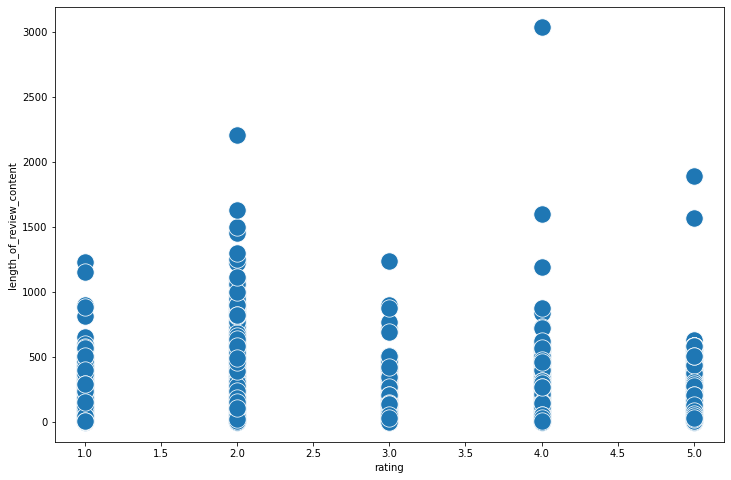

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=rating_prediction, y='length_of_review_content',x='rating',s=300)

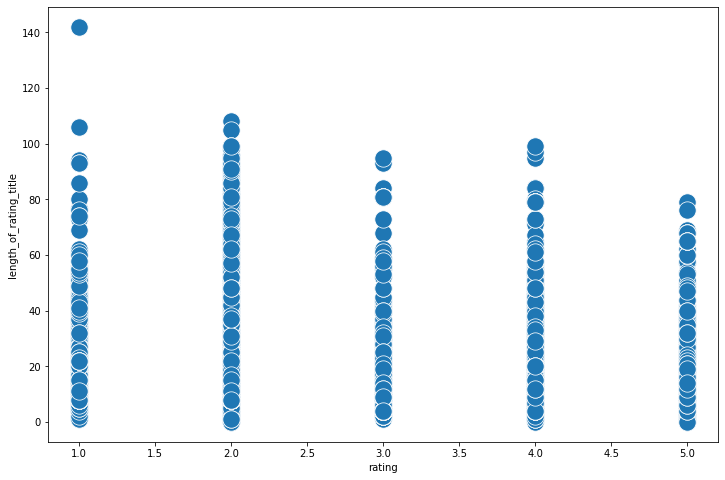

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=rating_prediction, y='length_of_rating_title',x='rating',s=300)

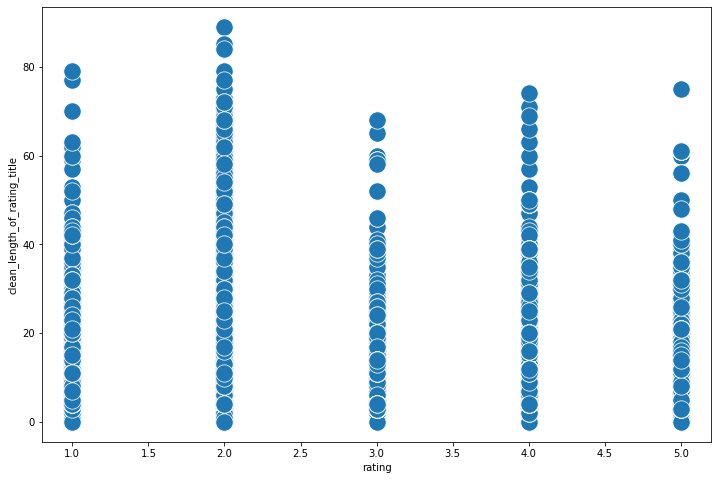

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=rating_prediction, y='clean_length_of_rating_title',x='rating',s=300)

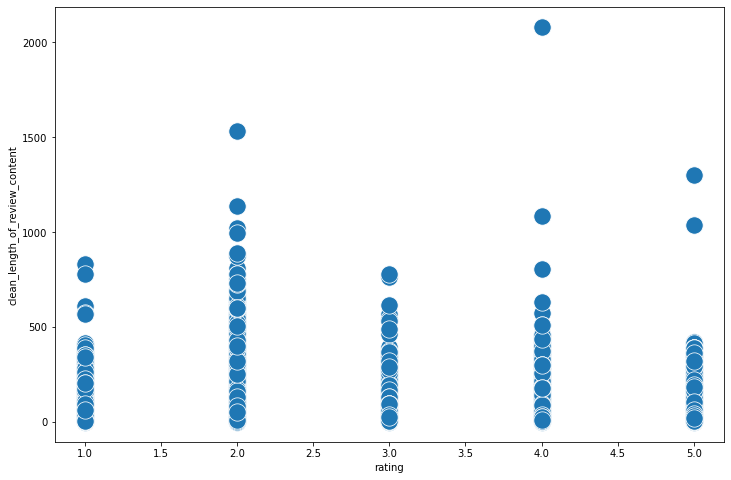

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=rating_prediction, y='clean_length_of_review_content',x='rating',s=300)

In [27]:
from nltk.stem.porter import PorterStemmer

In [28]:
# Training data

import re

def nlp_preprocessor(X,col):
    corpus_train=[]
    ps = PorterStemmer()
    for i in range(len(X)):
        input = re.sub('[^a-zA-Z]',' ',X[col][i]) # except a-z and A-Z, substitute all other characters with ' '
        input  = input.split() # tokenize the text
        input = [ps.stem(word) for word in input if word not in stopwords.words('english')] # ignoring stopwords and stemming rest of the words
        text = ' '.join(input)  # concatenating all words into a single text (list is created)#
        corpus_train.append(text) # appending text into a single corpus #
    print("The length of the corpus train is: ", len(corpus_train))
    return corpus_train

In [29]:
data = nlp_preprocessor(rating_prediction,'review_content')

The length of the corpus train is:  20950


In [30]:
cleaned_review_content = data.copy()

In [31]:
cleaned_rating_title = nlp_preprocessor(rating_prediction,'rating_title')

The length of the corpus train is:  20950


In [32]:
cleaned_rating_prediction = pd.DataFrame(list(zip(cleaned_review_content,cleaned_rating_title,rating_prediction.rating)),columns=['cleaned_review_content','cleaned_rating_title','rating'])

In [33]:
cleaned_rating_prediction

cleaned_review_content cleaned_rating_title  \
0                                           worst experi       unsatisfactori   
1      perform printer good print speed realli bad ma...                  bad   
2                           speaker wark bed product buy   utterli disappoint   
3      total unrelev product track servic give result...   money wast product   
4                                 satisfi return product           wast money   
...                                                  ...                  ...   
20945                                              supar                super   
20946                                              super             must buy   
20947                           numbr star camera beginn                  wow   
20948                 screen qualiti touch screen smooth         qualiti good   
20949                               good price rang like       classi product   

       rating  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
20945       5  
20946       5  
20947       5  
20948       5  
20949       5  

[20950 rows x 3 columns]

In [34]:
from wordcloud import WordCloud

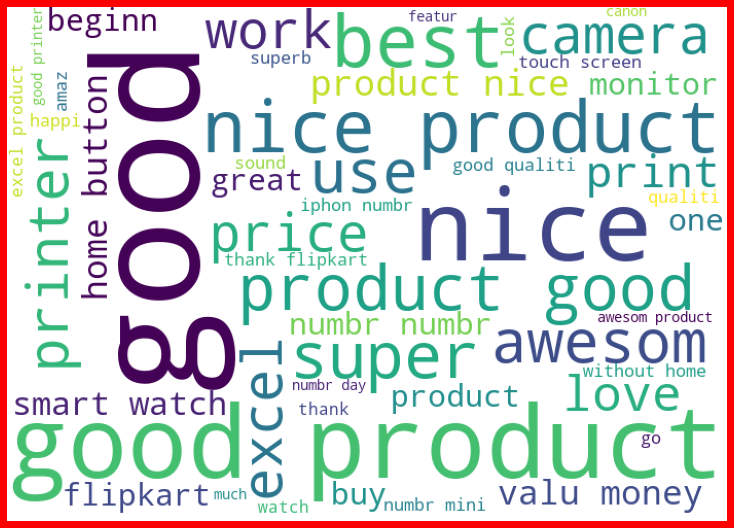

In [35]:
highest_rating = cleaned_rating_prediction['cleaned_review_content'][cleaned_rating_prediction['rating']==5]

highest_rating_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(highest_rating))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(highest_rating_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

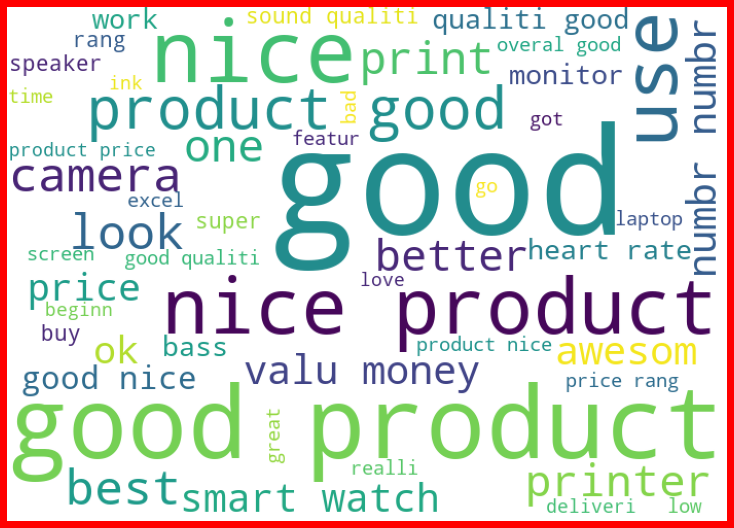

In [36]:
high_rating = cleaned_rating_prediction['cleaned_review_content'][cleaned_rating_prediction['rating']==4]

high_rating_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(high_rating))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(high_rating_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

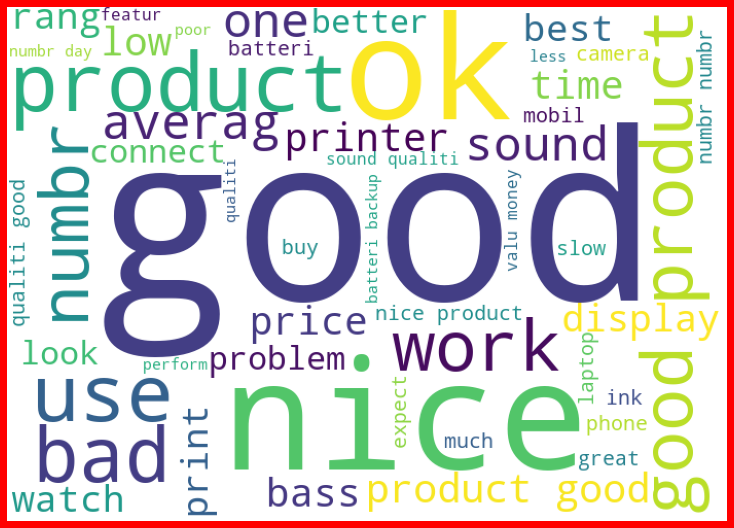

In [37]:
medium_rating = cleaned_rating_prediction['cleaned_review_content'][cleaned_rating_prediction['rating']==3]

medium_rating_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(medium_rating))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(medium_rating_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

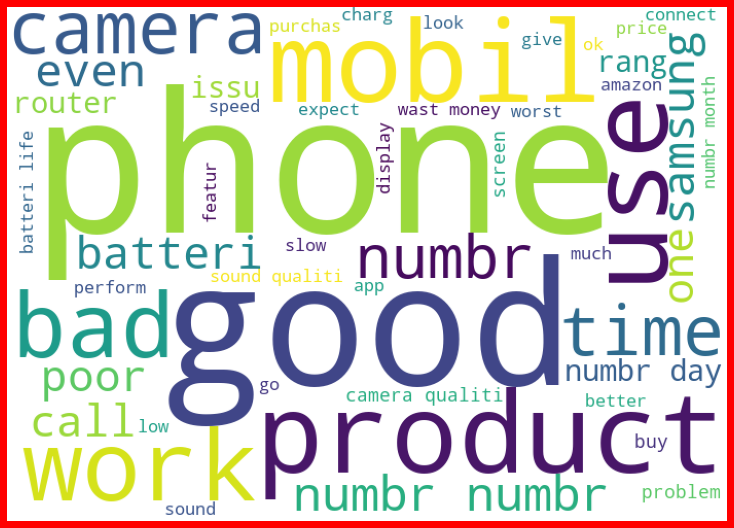

In [38]:
low_rating = cleaned_rating_prediction['cleaned_review_content'][cleaned_rating_prediction['rating']==2]

low_rating_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(low_rating))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(low_rating_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

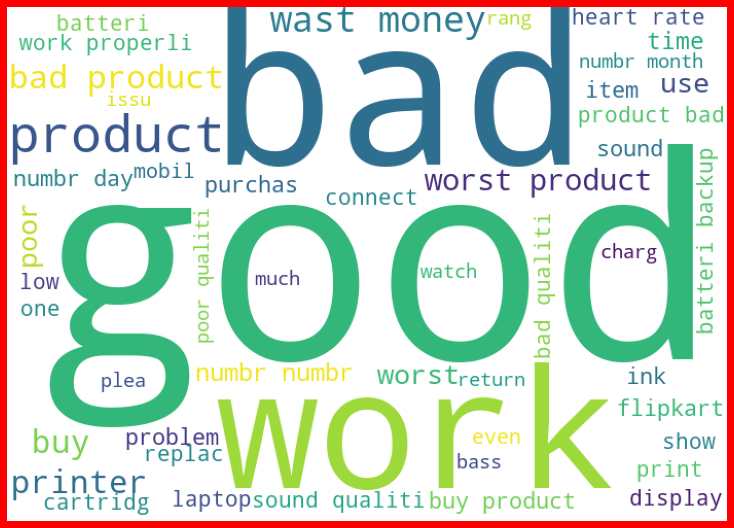

In [39]:
lowest_rating = cleaned_rating_prediction['cleaned_review_content'][cleaned_rating_prediction['rating']==1]

lowest_rating_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(lowest_rating))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(lowest_rating_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [40]:
cleaned_rating_prediction = cleaned_rating_prediction.sample(frac = 1)

In [41]:
cleaned_rating_prediction

cleaned_review_content  \
19171                                             awesom   
18294                     best get numbrk thank flipkart   
16576                          numbr day use osm product   
19778  amaz printer realli happi product also extrem ...   
17456                                              super   
...                                                  ...   
16736  fire boltt smart watch grt product econom pric...   
10399                                    base numbr good   
4775   poor perform finger sensor qualiti good better...   
4205   use almost numbr month write review happi mnum...   
13245  love watch easi comfort easi access use mobil ...   

                       cleaned_rating_title  rating  
19171                                 excel       5  
18294                        terrif purchas       5  
16576                          nice product       4  
19778                              must buy       5  
17456                        terrif purchas       5  
...                                     ...     ...  
16736                             worth buy       4  
10399                        decent product       3  
4775             poor perform samsung mobil       2  
4205                         unsatisfactori       2  
13245  price fire boltt bswnumbr best watch       4  

[20950 rows x 3 columns]

# Saving the cleaned data

In [42]:
cleaned_rating_prediction.to_csv('cleaned_rating_prediction.csv',index=False,columns=cleaned_rating_prediction.columns)

In [43]:
cleaned_rating_prediction  = pd.read_csv("cleaned_rating_prediction.csv")

In [44]:
cleaned_rating_prediction

cleaned_review_content  \
0                                                 awesom   
1                         best get numbrk thank flipkart   
2                              numbr day use osm product   
3      amaz printer realli happi product also extrem ...   
4                                                  super   
...                                                  ...   
20945  fire boltt smart watch grt product econom pric...   
20946                                    base numbr good   
20947  poor perform finger sensor qualiti good better...   
20948  use almost numbr month write review happi mnum...   
20949  love watch easi comfort easi access use mobil ...   

                       cleaned_rating_title  rating  
0                                     excel       5  
1                            terrif purchas       5  
2                              nice product       4  
3                                  must buy       5  
4                            terrif purchas       5  
...                                     ...     ...  
20945                             worth buy       4  
20946                        decent product       3  
20947            poor perform samsung mobil       2  
20948                        unsatisfactori       2  
20949  price fire boltt bswnumbr best watch       4  

[20950 rows x 3 columns]

In [45]:
cleaned_rating_prediction.isnull().sum()

cleaned_review_content    29
cleaned_rating_title      35
rating                     0
dtype: int64

In [46]:
cleaned_rating_prediction.dropna(inplace=True)

In [47]:
cleaned_rating_prediction.isnull().sum()

cleaned_review_content    0
cleaned_rating_title      0
rating                    0
dtype: int64

In [48]:
cleaned_rating_prediction.shape

(20895, 3)

# Train and Test split

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [50]:
tf_vec = TfidfVectorizer()

In [51]:
features = tf_vec.fit_transform(cleaned_rating_prediction['cleaned_rating_title']+['cleaned_review_content'])

In [52]:
X = features
y = cleaned_rating_prediction['rating']

In [53]:
X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [54]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,log_loss,recall_score,precision_score,f1_score

In [55]:
def train_n_pred_model(model_name):
    model_name.fit(X_train,Y_train)
    model_name.score(X_train,Y_train)
    y_preds = model_name.predict(x_test)
    print('Accuracy score of',model_name, 'is:')
    print(accuracy_score(y_test,y_preds))
    print("Recall -->" , recall_score(y_test,y_preds,average='weighted'))
    print("Precision -->" , precision_score(y_test,y_preds,average='weighted'))
    print("F1 Score --> ",f1_score(y_test,y_preds,average='weighted'))
    print(confusion_matrix(y_test,y_preds))
    print("Classification Report --> \n", classification_report(y_test,y_preds))

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
train_n_pred_model(DecisionTreeClassifier())

Accuracy score of DecisionTreeClassifier() is:
0.8730857580398163
Recall --> 0.8730857580398163
Precision --> 0.8767395615806683
F1 Score -->  0.8730176769245773
[[1006   47    4    6   10]
 [  54  832  106   32   12]
 [   7   29  961   15    5]
 [   3   40  111  868   33]
 [  10   29   29   81  894]]
Classification Report --> 
               precision    recall  f1-score   support

           1       0.93      0.94      0.93      1073
           2       0.85      0.80      0.83      1036
           3       0.79      0.94      0.86      1017
           4       0.87      0.82      0.84      1055
           5       0.94      0.86      0.90      1043

    accuracy                           0.87      5224
   macro avg       0.88      0.87      0.87      5224
weighted avg       0.88      0.87      0.87      5224



In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
train_n_pred_model(RandomForestClassifier())

Accuracy score of RandomForestClassifier() is:
0.8809341500765697
Recall --> 0.8809341500765697
Precision --> 0.885222160426246
F1 Score -->  0.8813255011312204
[[1001   57    2    3   10]
 [  32  881   99   19    5]
 [   4   28  960   20    5]
 [   2   41  109  868   35]
 [   5   36   28   82  892]]
Classification Report --> 
               precision    recall  f1-score   support

           1       0.96      0.93      0.95      1073
           2       0.84      0.85      0.85      1036
           3       0.80      0.94      0.87      1017
           4       0.88      0.82      0.85      1055
           5       0.94      0.86      0.90      1043

    accuracy                           0.88      5224
   macro avg       0.88      0.88      0.88      5224
weighted avg       0.89      0.88      0.88      5224



In [60]:
from sklearn.ensemble import AdaBoostClassifier

In [61]:
train_n_pred_model(AdaBoostClassifier())

Accuracy score of AdaBoostClassifier() is:
0.817572741194487
Recall --> 0.817572741194487
Precision --> 0.8387141716530245
F1 Score -->  0.8214124623223811
[[822 237   3   6   5]
 [ 33 849 102  48   4]
 [  4  40 933  38   2]
 [  2 113 106 826   8]
 [  3  82  27  90 841]]
Classification Report --> 
               precision    recall  f1-score   support

           1       0.95      0.77      0.85      1073
           2       0.64      0.82      0.72      1036
           3       0.80      0.92      0.85      1017
           4       0.82      0.78      0.80      1055
           5       0.98      0.81      0.88      1043

    accuracy                           0.82      5224
   macro avg       0.84      0.82      0.82      5224
weighted avg       0.84      0.82      0.82      5224



In [62]:
from sklearn.naive_bayes import MultinomialNB

In [63]:
train_n_pred_model(MultinomialNB())

Accuracy score of MultinomialNB() is:
0.8669601837672282
Recall --> 0.8669601837672282
Precision --> 0.8718069039426372
F1 Score -->  0.8670746747488156
[[1002   48    9    7    7]
 [  54  823  111   35   13]
 [   6   20  956   28    7]
 [   6   26  115  872   36]
 [   4   23   33  107  876]]
Classification Report --> 
               precision    recall  f1-score   support

           1       0.93      0.93      0.93      1073
           2       0.88      0.79      0.83      1036
           3       0.78      0.94      0.85      1017
           4       0.83      0.83      0.83      1055
           5       0.93      0.84      0.88      1043

    accuracy                           0.87      5224
   macro avg       0.87      0.87      0.87      5224
weighted avg       0.87      0.87      0.87      5224



In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
train_n_pred_model(KNeighborsClassifier())

Accuracy score of KNeighborsClassifier() is:
0.8696401225114855
Recall --> 0.8696401225114855
Precision --> 0.8729775592085589
F1 Score -->  0.8691065285136959
[[1011   40    4    7   11]
 [  79  819   96   29   13]
 [  10   21  959   20    7]
 [  16   29  111  864   35]
 [  16   19   29   89  890]]
Classification Report --> 
               precision    recall  f1-score   support

           1       0.89      0.94      0.92      1073
           2       0.88      0.79      0.83      1036
           3       0.80      0.94      0.87      1017
           4       0.86      0.82      0.84      1055
           5       0.93      0.85      0.89      1043

    accuracy                           0.87      5224
   macro avg       0.87      0.87      0.87      5224
weighted avg       0.87      0.87      0.87      5224



In [66]:
from sklearn.svm import SVC

In [67]:
train_n_pred_model(SVC())

Accuracy score of SVC() is:
0.8824655436447167
Recall --> 0.8824655436447167
Precision --> 0.8871954059260495
F1 Score -->  0.8830547418168528
[[999  59   2   5   8]
 [ 26 892  95  19   4]
 [  3  35 956  18   5]
 [  2  49 106 869  29]
 [  5  38  27  79 894]]
Classification Report --> 
               precision    recall  f1-score   support

           1       0.97      0.93      0.95      1073
           2       0.83      0.86      0.85      1036
           3       0.81      0.94      0.87      1017
           4       0.88      0.82      0.85      1055
           5       0.95      0.86      0.90      1043

    accuracy                           0.88      5224
   macro avg       0.89      0.88      0.88      5224
weighted avg       0.89      0.88      0.88      5224



# Hyperparameter Tuning

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf','poly']}

svc=SVC()

gs=GridSearchCV(svc,param_grid)
gs.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly']})

In [69]:
print(gs.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [70]:
svc=SVC(C=10,gamma=1,kernel='rbf')
svc.fit(X_train,Y_train)
svc.score(X_train,Y_train)
y_preds = svc.predict(x_test)
print('Accuracy score of SVC is:')
print(accuracy_score(y_test,y_preds))
print("Recall -->" , recall_score(y_test,y_preds,average='weighted'))
print("Precision -->" , precision_score(y_test,y_preds,average='weighted'))
print("F1 Score --> ",f1_score(y_test,y_preds,average='weighted'))
print(confusion_matrix(y_test,y_preds))
print("Classification Report --> \n", classification_report(y_test,y_preds))

Accuracy score of SVC is:
0.8811255742725881
Recall --> 0.8811255742725881
Precision --> 0.8852173591977948
F1 Score -->  0.8814702046564159
[[1004   52    3    6    8]
 [  33  877   97   22    7]
 [   3   32  960   18    4]
 [   3   39  109  869   35]
 [   6   26   30   88  893]]
Classification Report --> 
               precision    recall  f1-score   support

           1       0.96      0.94      0.95      1073
           2       0.85      0.85      0.85      1036
           3       0.80      0.94      0.87      1017
           4       0.87      0.82      0.84      1055
           5       0.94      0.86      0.90      1043

    accuracy                           0.88      5224
   macro avg       0.88      0.88      0.88      5224
weighted avg       0.89      0.88      0.88      5224



In [71]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,y_preds)
print(cf_matrix)

[[1004   52    3    6    8]
 [  33  877   97   22    7]
 [   3   32  960   18    4]
 [   3   39  109  869   35]
 [   6   26   30   88  893]]


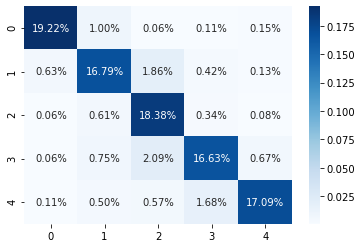

In [72]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [73]:
from sklearn.model_selection import cross_val_score

svcscores=cross_val_score(svc,X,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.8904044  0.87820053 0.87676478 0.87963628 0.88274707]
0.8815506101938263 0.004850012370484116


In [74]:
# Saving the SVC model
import joblib
joblib.dump(svc,'rating_prediction_model.pkl')

['rating_prediction_model.pkl']